In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [7]:
data=pd.read_csv(r"C:\ml\da\multiple_linear_regression.csv")
data.isna().sum()

Feature 1    0
Feature 2    0
Feature 3    0
Target       0
dtype: int64

In [8]:
data.head()

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [9]:
x=data.iloc[:,data.columns!="Target"]#input
y=data.Target#output

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)
x_train

,Feature 1,Feature 2,Feature 3
124,229.5,32.3,74.2
157,149.8,1.3,24.3
179,165.6,10.0,17.6
80,76.4,26.7,22.3
68,237.4,27.5,11.0
...,...,...,...
85,193.2,18.4,65.7
35,290.7,4.1,8.5
89,109.8,47.8,51.4
103,187.9,17.2,17.9


In [11]:
from sklearn.linear_model import LinearRegression 
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.coef_

array([ 0.04484225,  0.1932951 , -0.00502376])

In [12]:
lr.intercept_

3.2353266762109048

In [13]:
predict=lr.predict(x_test)

In [14]:
from sklearn.metrics import mean_squared_error
cost=mean_squared_error(predict,y_test)
cost

4.84035376381934

Text(0, 0.5, 'output')

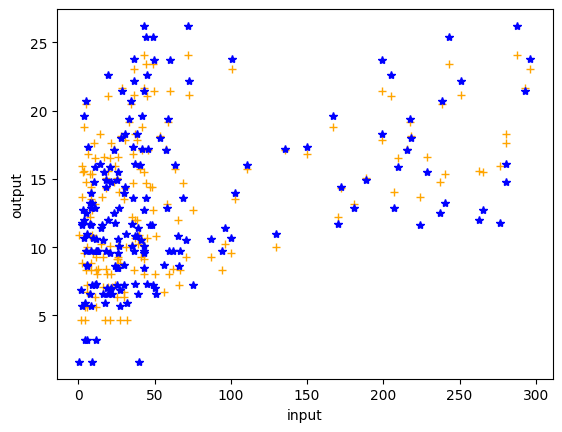

In [15]:
plt.plot(x_test,predict,"+",color="orange")
plt.plot(x_test,y_test,"*",color="blue")
plt.xlabel("input")
plt.ylabel("output")

In [16]:
residuals=y_test-predict

Text(0, 0.5, 'y_predicted')

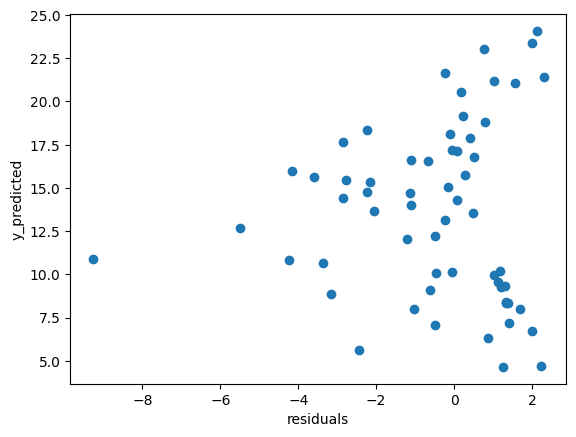

In [17]:
plt.scatter(residuals,predict)
plt.xlabel('residuals')
plt.ylabel("y_predicted")

C:\Users\preeti\AppData\Local\Temp\ipykernel_12032\1841234233.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


<Axes: xlabel='Target', ylabel='Density'>

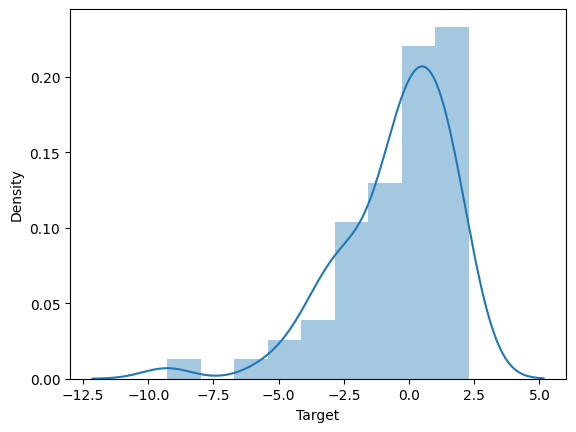

In [18]:
import seaborn as sns
sns.distplot(residuals)

<h1>OLS

In [19]:
import statsmodels.api as sm

In [21]:
x_with_constant=sm.add_constant(x_train)
x_with_constant

,const,Feature 1,Feature 2,Feature 3
124,1.0,229.5,32.3,74.2
157,1.0,149.8,1.3,24.3
179,1.0,165.6,10.0,17.6
80,1.0,76.4,26.7,22.3
68,1.0,237.4,27.5,11.0
...,...,...,...,...
85,1.0,193.2,18.4,65.7
35,1.0,290.7,4.1,8.5
89,1.0,109.8,47.8,51.4
103,1.0,187.9,17.2,17.9


In [24]:
model=sm.OLS(y_train,x_with_constant)


In [26]:
result=model.fit()

In [28]:
result.params

const        3.235327
Feature 1    0.044842
Feature 2    0.193295
Feature 3   -0.005024
dtype: float64

In [30]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     534.2
Date:                Thu, 09 Nov 2023   Prob (F-statistic):           5.03e-75
Time:                        22:36:59   Log-Likelihood:                -245.61
No. Observations:                 140   AIC:                             499.2
Df Residuals:                     136   BIC:                             511.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2353      0.323     10.003      0.0